
# Cognitive Effort Poster

Columns used:
- `condition`: `neg` or `neu`
- `response`: `easy` or `hard`
- `itemhit`: word hit rate
- `pairhit`: pair hit rate

Figures:
1. **1A. Word:** Hard vs Easy (expect Hard > Easy)
2. **1B. Pair:** Easy vs Hard (expect Easy > Hard)
3. **2A. Easy Words:** Negative vs Neutral (expect n.s. ~0.16)
4. **2B. Easy Pairs:** Negative vs Neutral (expect p ~ 0.04)


In [1]:
# 0) Imports and file path (keep it simple)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

DATA_FILE = "taskanalysis_copy.xlsx"
SHEET_NAME = "Sheet1"  # <-- you told me it's Sheet1


In [2]:

# 1) Load the data
df = pd.read_excel(DATA_FILE, sheet_name=SHEET_NAME)

# make sure key columns exist
needed = ["condition", "response", "itemhit", "pairhit"]
missing = [c for c in needed if c not in df.columns]
if missing:
    raise ValueError(f"These columns are missing: {missing}")

# normalize text (lowercase)
df["condition"] = df["condition"].astype(str).str.strip().str.lower()
df["response"]  = df["response"].astype(str).str.strip().str.lower()

print("Value counts:")
print("condition ->")
print(df["condition"].value_counts(dropna=False))
print("\nresponse  ->")
print(df["response"].value_counts(dropna=False))

df.head()


Value counts:
condition ->
neg    24
neu    19
Name: condition, dtype: int64

response  ->
easy    22
hard    21
Name: response, dtype: int64


,Row Labels,condition,response,pairhit,pairfar,itemhit,itemhitrelative,numberitemresponses,pairhitrelative,pairfarelative,numberpairtargets,numberpairlures
0,PEA_06_01,neg,easy,0.366667,0.233333,0.425000,0.689189,74,0.758621,0.411765,29,17
1,PEA_08_01,neg,easy,0.666667,0.066667,0.758333,0.758333,120,0.888889,0.100000,45,20
2,PEA_10_01,neg,easy,0.466667,0.033333,0.650000,0.678261,115,0.736842,0.066667,38,15
3,PEA_12_01,neg,easy,0.633333,0.133333,0.858333,0.880342,117,0.863636,0.190476,44,21
4,PEA_17_01,neg,easy,0.666667,0.233333,0.758333,0.758333,120,0.784314,0.304348,51,23


In [3]:

# 2) A small helper to get means/SE and a t-test
def group_stats(series):
    s = pd.to_numeric(series, errors="coerce").dropna()
    mean = s.mean()
    se = s.std(ddof=1) / np.sqrt(len(s)) if len(s) > 1 else np.nan
    return mean, se, len(s)

def two_group_ttest(a, b):
    a = pd.to_numeric(a, errors="coerce").dropna()
    b = pd.to_numeric(b, errors="coerce").dropna()
    if len(a) < 2 or len(b) < 2:
        return np.nan
    t, p = stats.ttest_ind(a, b, equal_var=False, nan_policy="omit")
    return p


## 1A. Words — Hard vs Easy

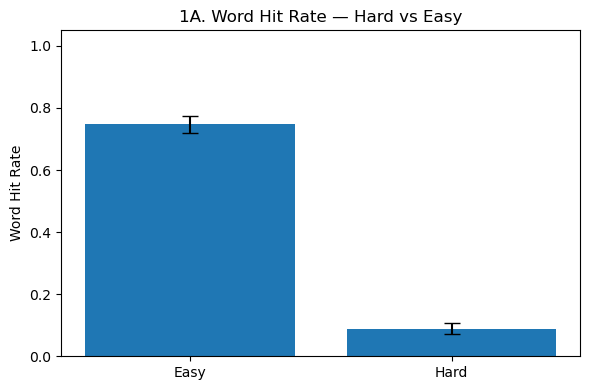

1A p-value (Hard vs Easy, Words) = 0.0000 | n_easy=22, n_hard=15


In [4]:

# Filter words by response groups
w_easy = df.loc[df["response"]=="easy", "itemhit"]
w_hard = df.loc[df["response"]=="hard", "itemhit"]

m_easy, se_easy, n_easy = group_stats(w_easy)
m_hard, se_hard, n_hard = group_stats(w_hard)
p_1a = two_group_ttest(w_hard, w_easy)

# Bar plot
fig, ax = plt.subplots(figsize=(6,4))
means = [m_easy, m_hard]
ses   = [se_easy, se_hard]
labels = ["Easy", "Hard"]

x = np.arange(2)
ax.bar(x, means, yerr=ses, capsize=6)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.set_ylabel("Word Hit Rate")
ax.set_title("1A. Word Hit Rate — Hard vs Easy")

plt.tight_layout()
plt.savefig("Fig1A_Word_HitRate.png", dpi=300)
plt.show()

print(f"1A p-value (Hard vs Easy, Words) = {p_1a:.4f} | n_easy={n_easy}, n_hard={n_hard}")


## 1B. Pairs — Easy vs Hard

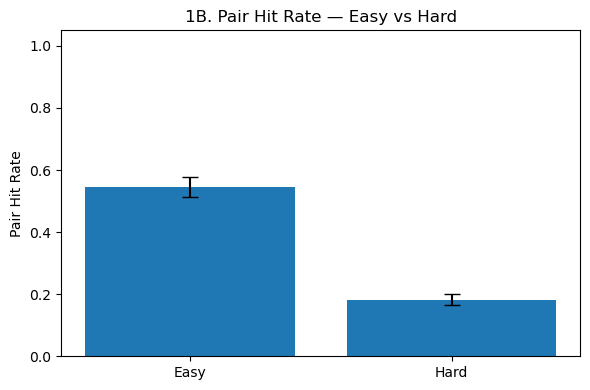

1B p-value (Easy vs Hard, Pairs) = 0.0000 | n_easy=22, n_hard=21


In [5]:

p_easy = df.loc[df['response']=="easy", "pairhit"]
p_hard = df.loc[df['response']=="hard", "pairhit"]

m_easy, se_easy, n_easy = group_stats(p_easy)
m_hard, se_hard, n_hard = group_stats(p_hard)
p_1b = two_group_ttest(p_easy, p_hard)

fig, ax = plt.subplots(figsize=(6,4))
means = [m_easy, m_hard]
ses   = [se_easy, se_hard]
labels = ["Easy", "Hard"]

x = np.arange(2)
ax.bar(x, means, yerr=ses, capsize=6)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.set_ylabel("Pair Hit Rate")
ax.set_title("1B. Pair Hit Rate — Easy vs Hard")

plt.tight_layout()
plt.savefig("Fig1B_Pair_HitRate.png", dpi=300)
plt.show()

print(f"1B p-value (Easy vs Hard, Pairs) = {p_1b:.4f} | n_easy={n_easy}, n_hard={n_hard}")


## 2A. Easy Words — Negative vs Neutral

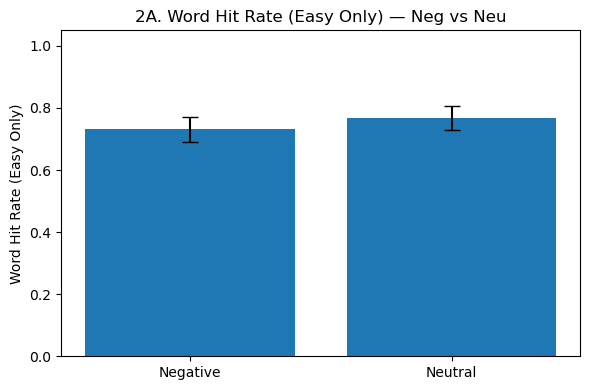

2A p-value (Easy Words, Neg vs Neu) = 0.5212 | n_neg=12, n_neu=10


In [6]:

w_easy_neg = df.loc[(df["response"]=="easy") & (df["condition"]=="neg"), "itemhit"]
w_easy_neu = df.loc[(df["response"]=="easy") & (df["condition"]=="neu"), "itemhit"]

m_neg, se_neg, n_neg = group_stats(w_easy_neg)
m_neu, se_neu, n_neu = group_stats(w_easy_neu)
p_2a = two_group_ttest(w_easy_neg, w_easy_neu)

fig, ax = plt.subplots(figsize=(6,4))
means = [m_neg, m_neu]
ses   = [se_neg, se_neu]
labels = ["Negative", "Neutral"]

x = np.arange(2)
ax.bar(x, means, yerr=ses, capsize=6)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.set_ylabel("Word Hit Rate (Easy Only)")
ax.set_title("2A. Word Hit Rate (Easy Only) — Neg vs Neu")

plt.tight_layout()
plt.savefig("Fig2A_EasyWord_Condition.png", dpi=300)
plt.show()

print(f"2A p-value (Easy Words, Neg vs Neu) = {p_2a:.4f} | n_neg={n_neg}, n_neu={n_neu}")


## 2B. Easy Pairs — Negative vs Neutral

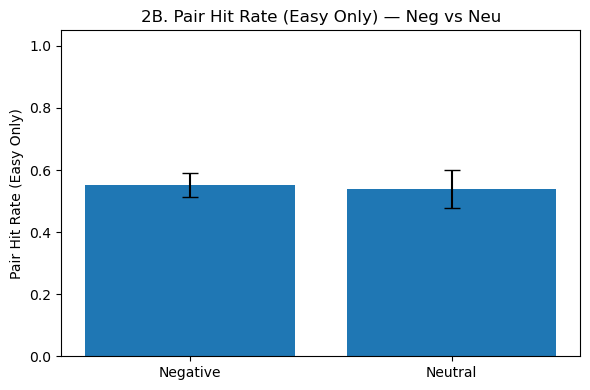

2B p-value (Easy Pairs, Neg vs Neu) = 0.8571 | n_neg=12, n_neu=10


In [7]:

p_easy_neg = df.loc[(df["response"]=="easy") & (df["condition"]=="neg"), "pairhit"]
p_easy_neu = df.loc[(df["response"]=="easy") & (df["condition"]=="neu"), "pairhit"]

m_neg, se_neg, n_neg = group_stats(p_easy_neg)
m_neu, se_neu, n_neu = group_stats(p_easy_neu)
p_2b = two_group_ttest(p_easy_neg, p_easy_neu)

fig, ax = plt.subplots(figsize=(6,4))
means = [m_neg, m_neu]
ses   = [se_neg, se_neu]
labels = ["Negative", "Neutral"]

x = np.arange(2)
ax.bar(x, means, yerr=ses, capsize=6)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.set_ylabel("Pair Hit Rate (Easy Only)")
ax.set_title("2B. Pair Hit Rate (Easy Only) — Neg vs Neu")

plt.tight_layout()
plt.savefig("Fig2B_EasyPair_Condition.png", dpi=300)
plt.show()

print(f"2B p-value (Easy Pairs, Neg vs Neu) = {p_2b:.4f} | n_neg={n_neg}, n_neu={n_neu}")
